<a href="https://colab.research.google.com/github/sautrikc/SUV-Buyers-Classification/blob/main/SUV_Buyers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SUV Buyer  Classification

### 1. Importing important libraries

In [3]:
import numpy as np                      #For calculations
import matplotlib.pyplot as plt         #For plotting
import pandas as pd                     #For operations on dataframes


#To disable all the warnings
import warnings
warnings.filterwarnings('ignore')


### 2. Importing the dataset

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sautrikc/SUV-Buyers-Classification/main/Social_Network_Ads.csv')


### 3. Exploring the dataset

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# Selecting the feature and target variables

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

### 4. Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 5. Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6. Defining the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

### 7. For Visualising the results

In [10]:
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.rcParams['figure.figsize']=9,6

def mapVisualisation(title, classifier,X,y):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

### 8. Training the Logistic Regression model on the Training set

### (Linear classifier)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
#Predicting the Test set results
y_pred_log = classifier_log.predict(X_test)

In [13]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [14]:
#predicted values
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

[[65  3]
 [ 8 24]]


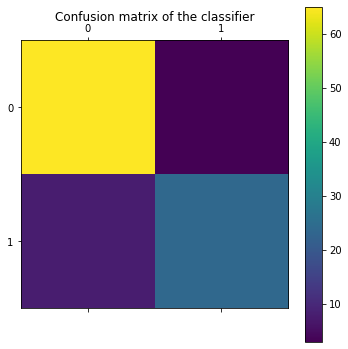

In [15]:
# Visualizing the Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

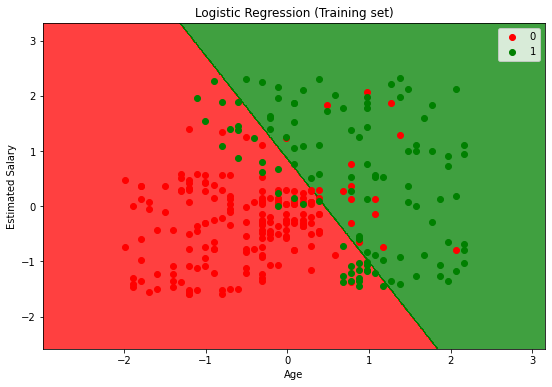

In [16]:
# Visualising the Training set results

mapVisualisation('Logistic Regression (Training set)', classifier_log,X_train,y_train)

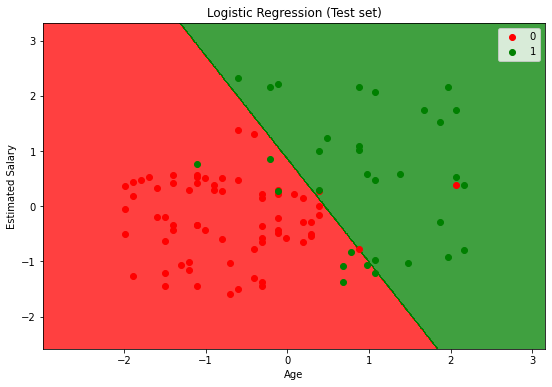

In [17]:
# Visualising the Test set results

mapVisualisation('Logistic Regression (Test set)', classifier_log,X_test,y_test)

### 9. Training the K-NN model on the Training set

### (Non-linear classifier)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
#Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [20]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [21]:
#predicted values
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

[[64  4]
 [ 3 29]]


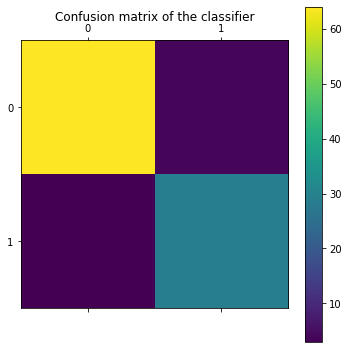

In [22]:
#Finding confusion matrix
print(confusion_matrix(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

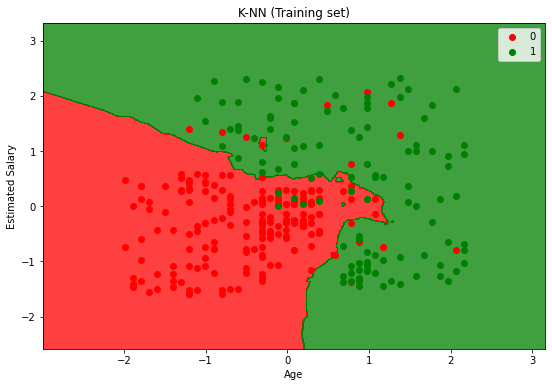

In [23]:
# Visualising the Training set results

mapVisualisation('K-NN (Training set)', classifier_knn,X_train,y_train)

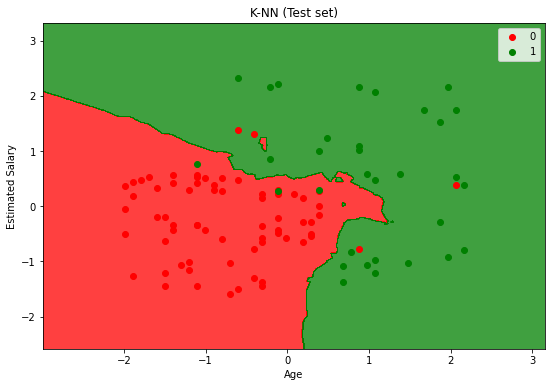

In [24]:
# Visualising the Test set results

mapVisualisation('K-NN (Test set)', classifier_knn,X_test,y_test)

### 10. Training the SVM model on the Training set

### (Linear Classifier)

In [25]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
#Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [27]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [28]:
#predicted values
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

[[66  2]
 [ 8 24]]


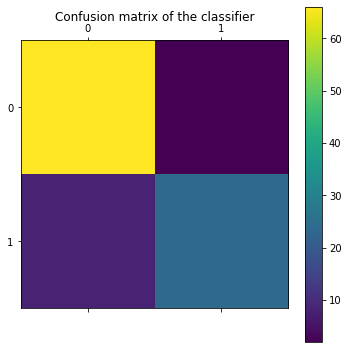

In [29]:
#Finding confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

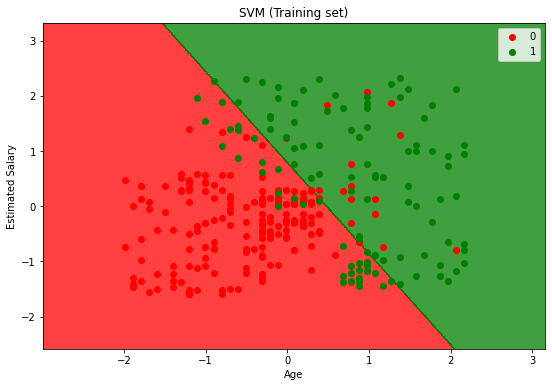

In [30]:
# Visualising the Training set results

mapVisualisation('SVM (Training set)', classifier_svm,X_train,y_train)

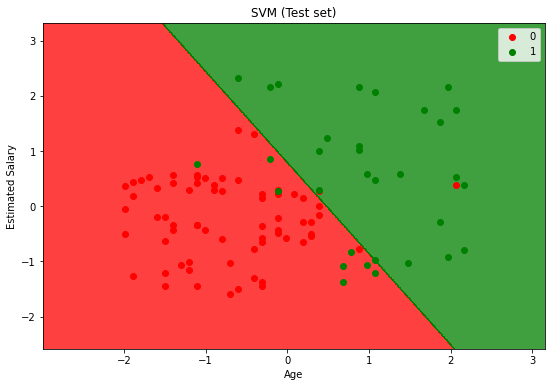

In [31]:
# Visualising the Test set results

mapVisualisation('SVM (Test set)', classifier_svm,X_test,y_test)


### 11. Training the Kernel SVM model on the Training set

### (Non-linear classifier)

In [32]:
from sklearn.svm import SVC
classifier_ker = SVC(kernel = 'rbf', random_state = 0)
classifier_ker.fit(X_train, y_train)

SVC(random_state=0)

In [33]:
#Predicting the Test set results
y_pred_ker = classifier_ker.predict(X_test)

In [34]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [35]:
#predicted values
y_pred_ker

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

[[64  4]
 [ 3 29]]


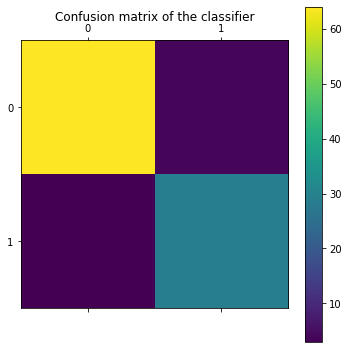

In [36]:
#Finding confusion matrix
print(confusion_matrix(y_test, y_pred_ker))

cm = confusion_matrix(y_test, y_pred_ker)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

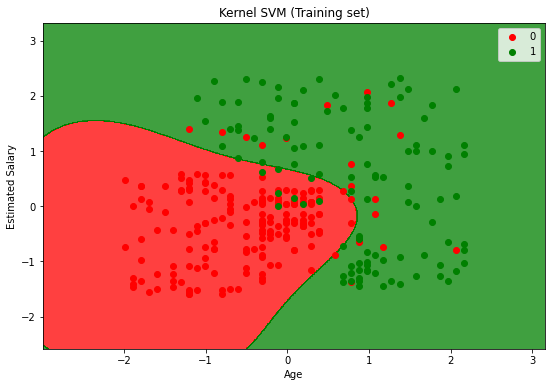

In [37]:
# Visualising the Training set results

mapVisualisation('Kernel SVM (Training set)', classifier_ker,X_train,y_train)

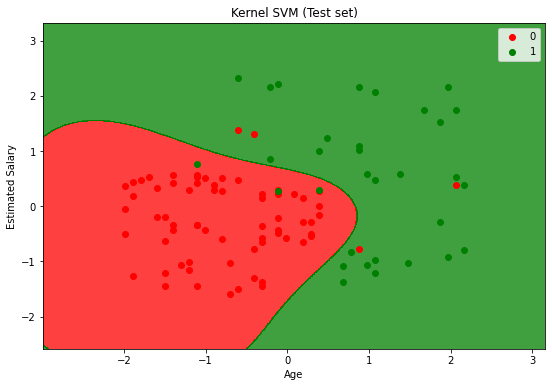

In [38]:
# Visualising the Test set results

mapVisualisation('Kernel SVM (Test set)', classifier_ker,X_test,y_test)


### 12. Training the Decision Tree Classification model on the Training set

### (Non-linear classifier)

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
#Predicting the Test set results
y_pred_dtc = classifier_dtc.predict(X_test)

In [41]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [42]:
#predicted values
y_pred_dtc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

[[62  6]
 [ 3 29]]


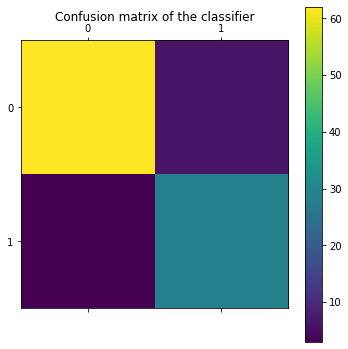

In [43]:
#find confusion matrix
print(confusion_matrix(y_test, y_pred_dtc))

cm = confusion_matrix(y_test, y_pred_dtc)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

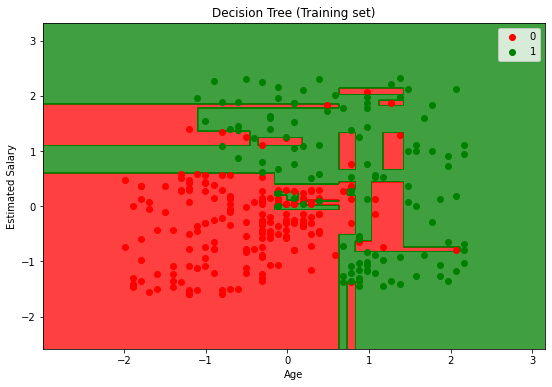

In [44]:
# Visualising the Training set results

mapVisualisation('Decision Tree (Training set)', classifier_dtc,X_train,y_train)

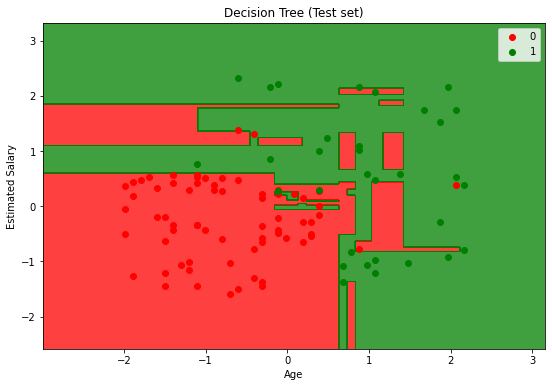

In [45]:
# Visualising the Test set results

mapVisualisation('Decision Tree (Test set)', classifier_dtc,X_test,y_test)


### 13. Training the Random Forest Classification model on the Training set

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100,max_features = 2, max_depth=10,random_state=42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, random_state=42)

In [47]:
#Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [48]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [49]:
#predicted values
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

[[63  5]
 [ 3 29]]


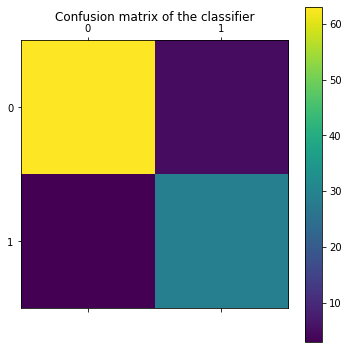

In [50]:
#find confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

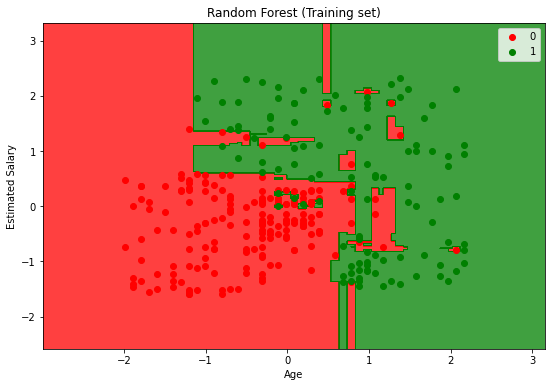

In [51]:
# Visualising the Training set results

mapVisualisation('Random Forest (Training set)', classifier_rf,X_train,y_train)

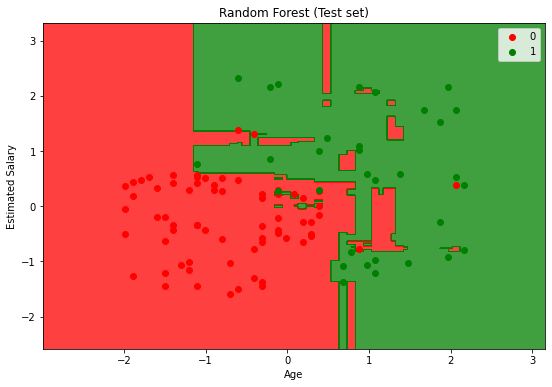

In [52]:
# Visualising the Test set results

mapVisualisation('Random Forest (Test set)', classifier_rf,X_test,y_test)

### 14. Comparing the data models that fits the best

In [53]:
# Model Accuracy, how often is the classifier correct?

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [54]:
# Applying k-Fold Cross Validation on Logistic Regression
accuracies = cross_val_score(estimator = classifier_log, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [76.66666666666667, 86.66666666666667, 73.33333333333333, 86.66666666666667, 70.0, 66.66666666666666, 83.33333333333334, 93.33333333333333, 96.66666666666667, 90.0]


Mean Accuracy: 82.33 %
Standard Deviation: 9.67 %


In [55]:
print('Accuracy of Logistic Regression on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_log)*100))

Accuracy of Logistic Regression on test set: 89.00%


In [56]:
# Applying k-Fold Cross Validation on KNN Classifier
accuracies = cross_val_score(estimator = classifier_knn, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [83.33333333333334, 96.66666666666667, 76.66666666666667, 93.33333333333333, 86.66666666666667, 90.0, 90.0, 93.33333333333333, 100.0, 96.66666666666667]


Mean Accuracy: 90.67 %
Standard Deviation: 6.63 %


In [57]:
print('Accuracy of KNN Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_knn)*100))

Accuracy of KNN Classifier on test set: 93.00%


In [58]:
# Applying k-Fold Cross Validation on SVM Classifier
accuracies = cross_val_score(estimator = classifier_svm, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [76.66666666666667, 80.0, 73.33333333333333, 83.33333333333334, 73.33333333333333, 66.66666666666666, 83.33333333333334, 93.33333333333333, 96.66666666666667, 86.66666666666667]


Mean Accuracy: 81.33 %
Standard Deviation: 8.84 %


In [59]:
print('Accuracy of SVM Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_svm)*100))

Accuracy of SVM Classifier on test set: 90.00%


In [60]:
# Applying k-Fold Cross Validation on Kernel SVM Classifier
accuracies = cross_val_score(estimator = classifier_ker, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [80.0, 96.66666666666667, 80.0, 96.66666666666667, 86.66666666666667, 86.66666666666667, 90.0, 93.33333333333333, 100.0, 93.33333333333333]


Mean Accuracy: 90.33 %
Standard Deviation: 6.57 %


In [61]:
print('Accuracy of Kernel SVM Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_ker)*100))

Accuracy of Kernel SVM Classifier on test set: 93.00%


In [62]:
# Applying k-Fold Cross Validation on Decision Tree Classifier
accuracies = cross_val_score(estimator = classifier_dtc, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [83.33333333333334, 86.66666666666667, 70.0, 83.33333333333334, 86.66666666666667, 83.33333333333334, 90.0, 86.66666666666667, 96.66666666666667, 83.33333333333334]


Mean Accuracy: 85.00 %
Standard Deviation: 6.37 %


In [63]:
print('Accuracy of Decision Tree Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_dtc)*100))

Accuracy of Decision Tree Classifier on test set: 91.00%


In [64]:
# Applying k-Fold Cross Validation on Random Forest Classifier
accuracies = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [83.33333333333334, 90.0, 76.66666666666667, 93.33333333333333, 83.33333333333334, 83.33333333333334, 83.33333333333334, 90.0, 96.66666666666667, 93.33333333333333]


Mean Accuracy: 87.33 %
Standard Deviation: 5.93 %


In [65]:
print('Accuracy of Random Forest on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_dtc)*100))

Accuracy of Random Forest on test set: 91.00%


The KNN classifier and the Kernel SVM gives the highest accuracy of **93%**.